## CNN Fundamentals

- A CNN is a stack of layers, such as Convolutional layers, pooling layers, and fully connected layers.

- CNNs by design preserve the spatial structure of the data during learning, which is useful when dealing with image data.

* **

- Convolutional Layer:

    - Initially, the input is connected to a set of convolution layers. These convolution layers slide a patch of weights (sometimes called the convolution window or filter) over the input and produce an output by means of the convolution operation. 
    
    - Convolution layers use a small number of weights, organized to cover only a small patch of input in each layer, unlike fully connected neural networks, and these weights are shared across certain dimensions (for example, the width and height dimensions of an image). 
    
    - Also, CNNs use the convolution operations to share the weights from the output by sliding this small set of weights along the desired dimension. 
    
    - Finally, we will get a matrix as the convolution output.
    
    
- Also, these convolution layers are optionally interleaved with pooling/ subsampling layers, which reduces the dimensionality of the input. 

    - While reducing the dimensionality, we make the translation of CNNs invariant, as well as force the CNN to learn with less information, leading to better generalization and regularization of the model. 
    
    - The dimensionality is reduced by dividing the input into several patches and transforming each patch into a single element. For example, such transformations include picking the maximum element of a patch or averaging all the values in a patch. 
    
    
* **

- **Standard Convolutional Operation:**
    - In brief, **filter size** refers to the window size of the convolution operation, **stride** refers to the distance between two movements of the convolution window, and **padding** refers to the way you handle the boundaries of the input. 
    
<div align='center'>
    <img src="images/std_conv_operation.png"/>
</div>

> **Note:** The output produced by the convolution operation(like above) is sometimes called a **features map**.


- **Convolving with stride:**

<div align='center'>
    <img src="images/conv_with_stride.png"/>
</div>

- **Convolving with padding:**

<div align='center'>
    <img src="images/conv_with_padding.png" width=500/>
</div>

* **

- **Pooling Operation**
    - The pooling operation, which is sometimes known as the subsampling operation, was introduced to CNNs mainly for reducing the size of the intermediate outputs as well as for making the translation of CNNs invariant.
    
    - This is preferred over the natural dimensionality reduction caused by convolution without padding, as we can decide where to reduce the size of the output with the pooling layer, in contrast to forcing it to happen every time. 
    
- Max Pooling
<div align='center'>
    <img src="images/max_pooling.png" width=500/>
</div>

- Max Pooling with Stride
<div align='center'>
    <img src="images/max_pooling_with_stride.png" width=500/>
</div>

- Average Pooling
<div align='center'>
    <img src="images/avg_pooling.png" width=500/>
</div>

* **

- **Fully Connected Layers:**

    - Fully connected layers are a fully connected set of weights from the input to the output. These fully connected weights are able to learn global information as they are connected from each input to each output. Also, having such layers of full connectedness allows us to combine features learned by the convolution layers preceding the fully connected layers, globally, to produce meaningful outputs.
    
* **

### How CNNs Work?

- As shown in Figure, the convolution, pooling, and fully connected layers come together to form an end-to-end learning model that takes raw data, which can be high-dimensional (for example, RGB images) and produce meaningful output (for example, the class of the object). 

<div align='center'>
    <img src="images/cnn.png" width=500/>
</div>

1. **First, the convolution layers learn the spatial features of the images.**

2. **The lower convolution layers learn low-level features such as differently oriented edges present in the images**, and 

3. **the higher layers learn more high- level features such as shapes present in the images (for example, circles and triangles) or bigger parts of an object (for example, the face of a dog, tail of a dog, and front section of a car).** 

4. **The pooling layers in the middle make each of these learned features slightly translation invariant. This means that, in a new image, even if the feature appears a bit offset compared to the location in which the feature appeared in the learned images, the CNN will still recognize that feature.** 

5. **Finally, the fully connected layers combine the high-level features learned by the CNN to produce global representations** that will be used by the final output layer to determine the class the object belongs to.

* **


## Image Classification on Fashion-MNIST Data

### Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(f"train_images is of shape: {train_images.shape}")
print(f"train_labels is of shape: {train_labels.shape}")
print(f"test_images is of shape: {test_images.shape}")
print(f"test_labels is of shape: {test_labels.shape}")

# Available at: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
label_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

train_images is of shape: (60000, 28, 28)
train_labels is of shape: (60000,)
test_images is of shape: (10000, 28, 28)
test_labels is of shape: (10000,)


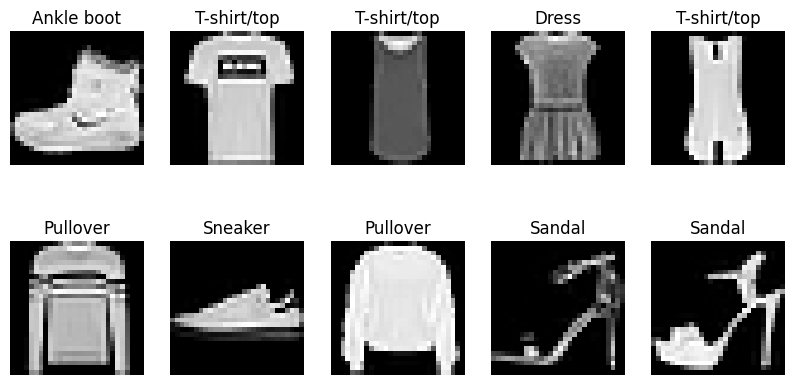

In [4]:
n_rows = 2
n_cols = 5
f, axes = plt.subplots(n_rows, n_cols, figsize=(10,5))

for row in range(len(axes)):
    for col in range(len(axes[row])):
    
        axes[row][col].imshow(train_images[row*n_cols+col, :, :], cmap=plt.get_cmap('gray'))
        axes[row][col].set_title(label_map[train_labels[row*n_cols+col]])
        axes[row][col].axis('off')

In [5]:
train_images = train_images[:, : , :, None]
test_images = test_images[:, : ,: , None]

print(f"train_images is of shape: {train_images.shape}")
print(f"train_labels is of shape: {train_labels.shape}")
print(f"test_images is of shape: {test_images.shape}")
print(f"test_labels is of shape: {test_labels.shape}")

train_images is of shape: (60000, 28, 28, 1)
train_labels is of shape: (60000,)
test_images is of shape: (10000, 28, 28, 1)
test_labels is of shape: (10000,)


### Define Hyperparams

In [6]:
batch_size = 100 # This is the typical batch size we've been using

image_size = 28 # This is the width/height of a single image

# Number of color channels in an image. These are black and white images 
n_channels = 1 

# Number of different digits we have images for (i.e. classes)
n_classes = 10

### Define & Train CNN Model

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K

In [8]:
K.clear_session()

lenet_like_model = Sequential([
    # 1st convolutional layer
    Conv2D(
        filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu', 
        input_shape=(image_size,image_size,n_channels)
    ), # in 28x28 / out 24x24
    # 1st max pooling layer
    MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'), # in 24x24 / out 12x12
    # 2nd convolutional layer
    Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'), # in 12x12 / out 8x8
    # 2nd max pooling layer
    MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'), # in 8x8 / out 4x4
    # 3rd convolutional layer
    Conv2D(filters=120, kernel_size=(4,4), strides=(1,1), padding='valid', activation='relu'), # in 4x4 / out 1x1
    # flatten the output of the last layer to suit a fully connected layer
    Flatten(),
    # First dense (fully-connected) layer
    Dense(84, activation='relu'),
    # Final prediction layer
    Dense(n_classes, activation='softmax')
])

# Compile with a loss and an optimizer
lenet_like_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary
lenet_like_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         30840     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [9]:
lenet_like_model.fit(train_images, train_labels, 
                     validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 12s 4ms/step - loss: 0.6128 - accuracy: 0.8034 - val_loss: 0.4207 - val_accuracy: 0.8472
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3835 - accuracy: 0.8606 - val_loss: 0.3672 - val_accuracy: 0.8712
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3425 - accuracy: 0.8746 - val_loss: 0.3568 - val_accuracy: 0.8740
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3161 - accuracy: 0.8826 - val_loss: 0.3425 - val_accuracy: 0.8786
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2937 - accuracy: 0.8910 - val_loss: 0.3492 - val_accuracy: 0.8789


In [12]:
lenet_like_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3688 - accuracy: 0.8735


[0.3688209056854248, 0.8734999895095825]

In [13]:
test_predictions = lenet_like_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


### Visualizing MNIST Results

In [14]:
def collect_correct_incorrect_samples(test_images, test_labels, test_predictions, n_correct=10, n_incorrect=10):
        

    # Visualization purposes
    correctly_predicted_images, correct_labels, correct_predictions = [], [], []
    incorrectly_predicted_images, incorrect_labels, incorrect_predictions = [], [], []
    
    test_predicted_labels = np.argmax(test_predictions, axis=-1)
    
    i_correct, i_incorrect = 0, 0
    for sample_image, sample_label, sample_prediction, sample_predicted_label  in zip(test_images, test_labels, test_predictions, test_predicted_labels):
        
        if i_correct < n_correct and sample_predicted_label == sample_label:
            correctly_predicted_images.append(sample_image[:, :, 0])
            correct_predictions.append(sample_prediction)
            correct_labels.append(sample_label)
            i_correct += 1
            
        if i_incorrect < n_incorrect and sample_predicted_label != sample_label:
            incorrectly_predicted_images.append(sample_image[:, :, 0])
            incorrect_predictions.append(sample_prediction)
            incorrect_labels.append(sample_label)
            i_incorrect += 1
            
        if i_correct >= n_correct and i_incorrect >= n_incorrect:
            break
            
    
    correctly_predicted_images = np.stack(correctly_predicted_images, axis=0)    
    correct_labels = np.array(correct_labels)
    correct_predictions = np.stack(correct_predictions, axis=0)
    incorrectly_predicted_images = np.stack(incorrectly_predicted_images, axis=0)
    incorrect_labels = np.array(incorrect_labels)
    incorrect_predictions = np.stack(incorrect_predictions, axis=0)

    return (correctly_predicted_images, correct_labels, correct_predictions), (incorrectly_predicted_images, incorrect_labels, incorrect_predictions)

In [15]:
(correctly_predicted_images, correct_labels, correct_predictions), \
(incorrectly_predicted, incorrect_labels, incorrect_predictions) = \
collect_correct_incorrect_samples(test_images, test_labels, test_predictions)


In [16]:
correct_predictions[4,:]

array([4.8076805e-02, 7.7227206e-04, 5.0446287e-02, 1.6143696e-02,
       2.4061825e-02, 3.8189883e-05, 8.5142606e-01, 1.5508960e-05,
       9.0150479e-03, 4.3690666e-06], dtype=float32)

In [17]:
from math import ceil

def plot_correct_incorrect_instances(n_classes=10, label_map=None):
    
    (correctly_predicted_images, correct_labels, correct_predictions), \
    (incorrectly_predicted_images, incorrect_labels, incorrect_predictions) = collect_correct_incorrect_samples(test_images, test_labels, test_predictions)
        
    n_cols = correctly_predicted_images.shape[0]
    # Defining the plot related settings
    f, axes = plt.subplots(4, n_cols, figsize=(25,20))  # in inches
    
    width=0.5 # Width of a bar in the barchart
    padding = 0.05 # Padding between two bars
    
    labels = [label_map[i] for i in range(n_classes)]
    
    # Defining X axis
    x_axis = np.arange(0, n_classes)

    for row, axes_row in enumerate(axes):
        for col, ax in enumerate(axes_row):
            if row == 0:    
                if col==ceil(n_cols/2.0)-1:
                    ax.set_title('Correctly Classified Samples',fontsize=24, pad=20)
                    
                ax.imshow(correctly_predicted_images[col], cmap='gray')    
                ax.axis('off')
            elif row == 1:
                if col==ceil(n_cols/2.0)-1:
                    ax.set_title('Softmax Predictions for Correctly Classified Samples',fontsize=24, pad=20)
                    
                ax.barh(x_axis + padding, correct_predictions[col], width)
                ax.set_xlim([0.0,1.0])    
                ax.set_yticks(x_axis)
                if col==0:
                    ax.set_yticklabels(labels)
            elif row == 2:
                if col==ceil(n_cols/2.0)-1:
                    ax.set_title('Softmax Predictions for Incorrectly Classified Samples',fontsize=24, pad=20)
                    
                ax.imshow(incorrectly_predicted_images[col], cmap='gray')    
                ax.axis('off')
            elif row == 3:
                if col==ceil(n_cols/2.0)-1:
                    ax.set_title('Softmax Predictions for Incorrectly Classified Samples',fontsize=24, pad=20)
                    
                ax.barh(x_axis + padding, incorrect_predictions[col], width)
                ax.set_xlim([0.0,1.0])    
                ax.set_yticks(x_axis)
                if col==0:
                    ax.set_yticklabels(labels)
            
            ax.grid(True, alpha=0.4, linestyle='--', axis='y')
    # Save the figure
    #pylab.savefig('mnist_results.png')
    
    plt.show()

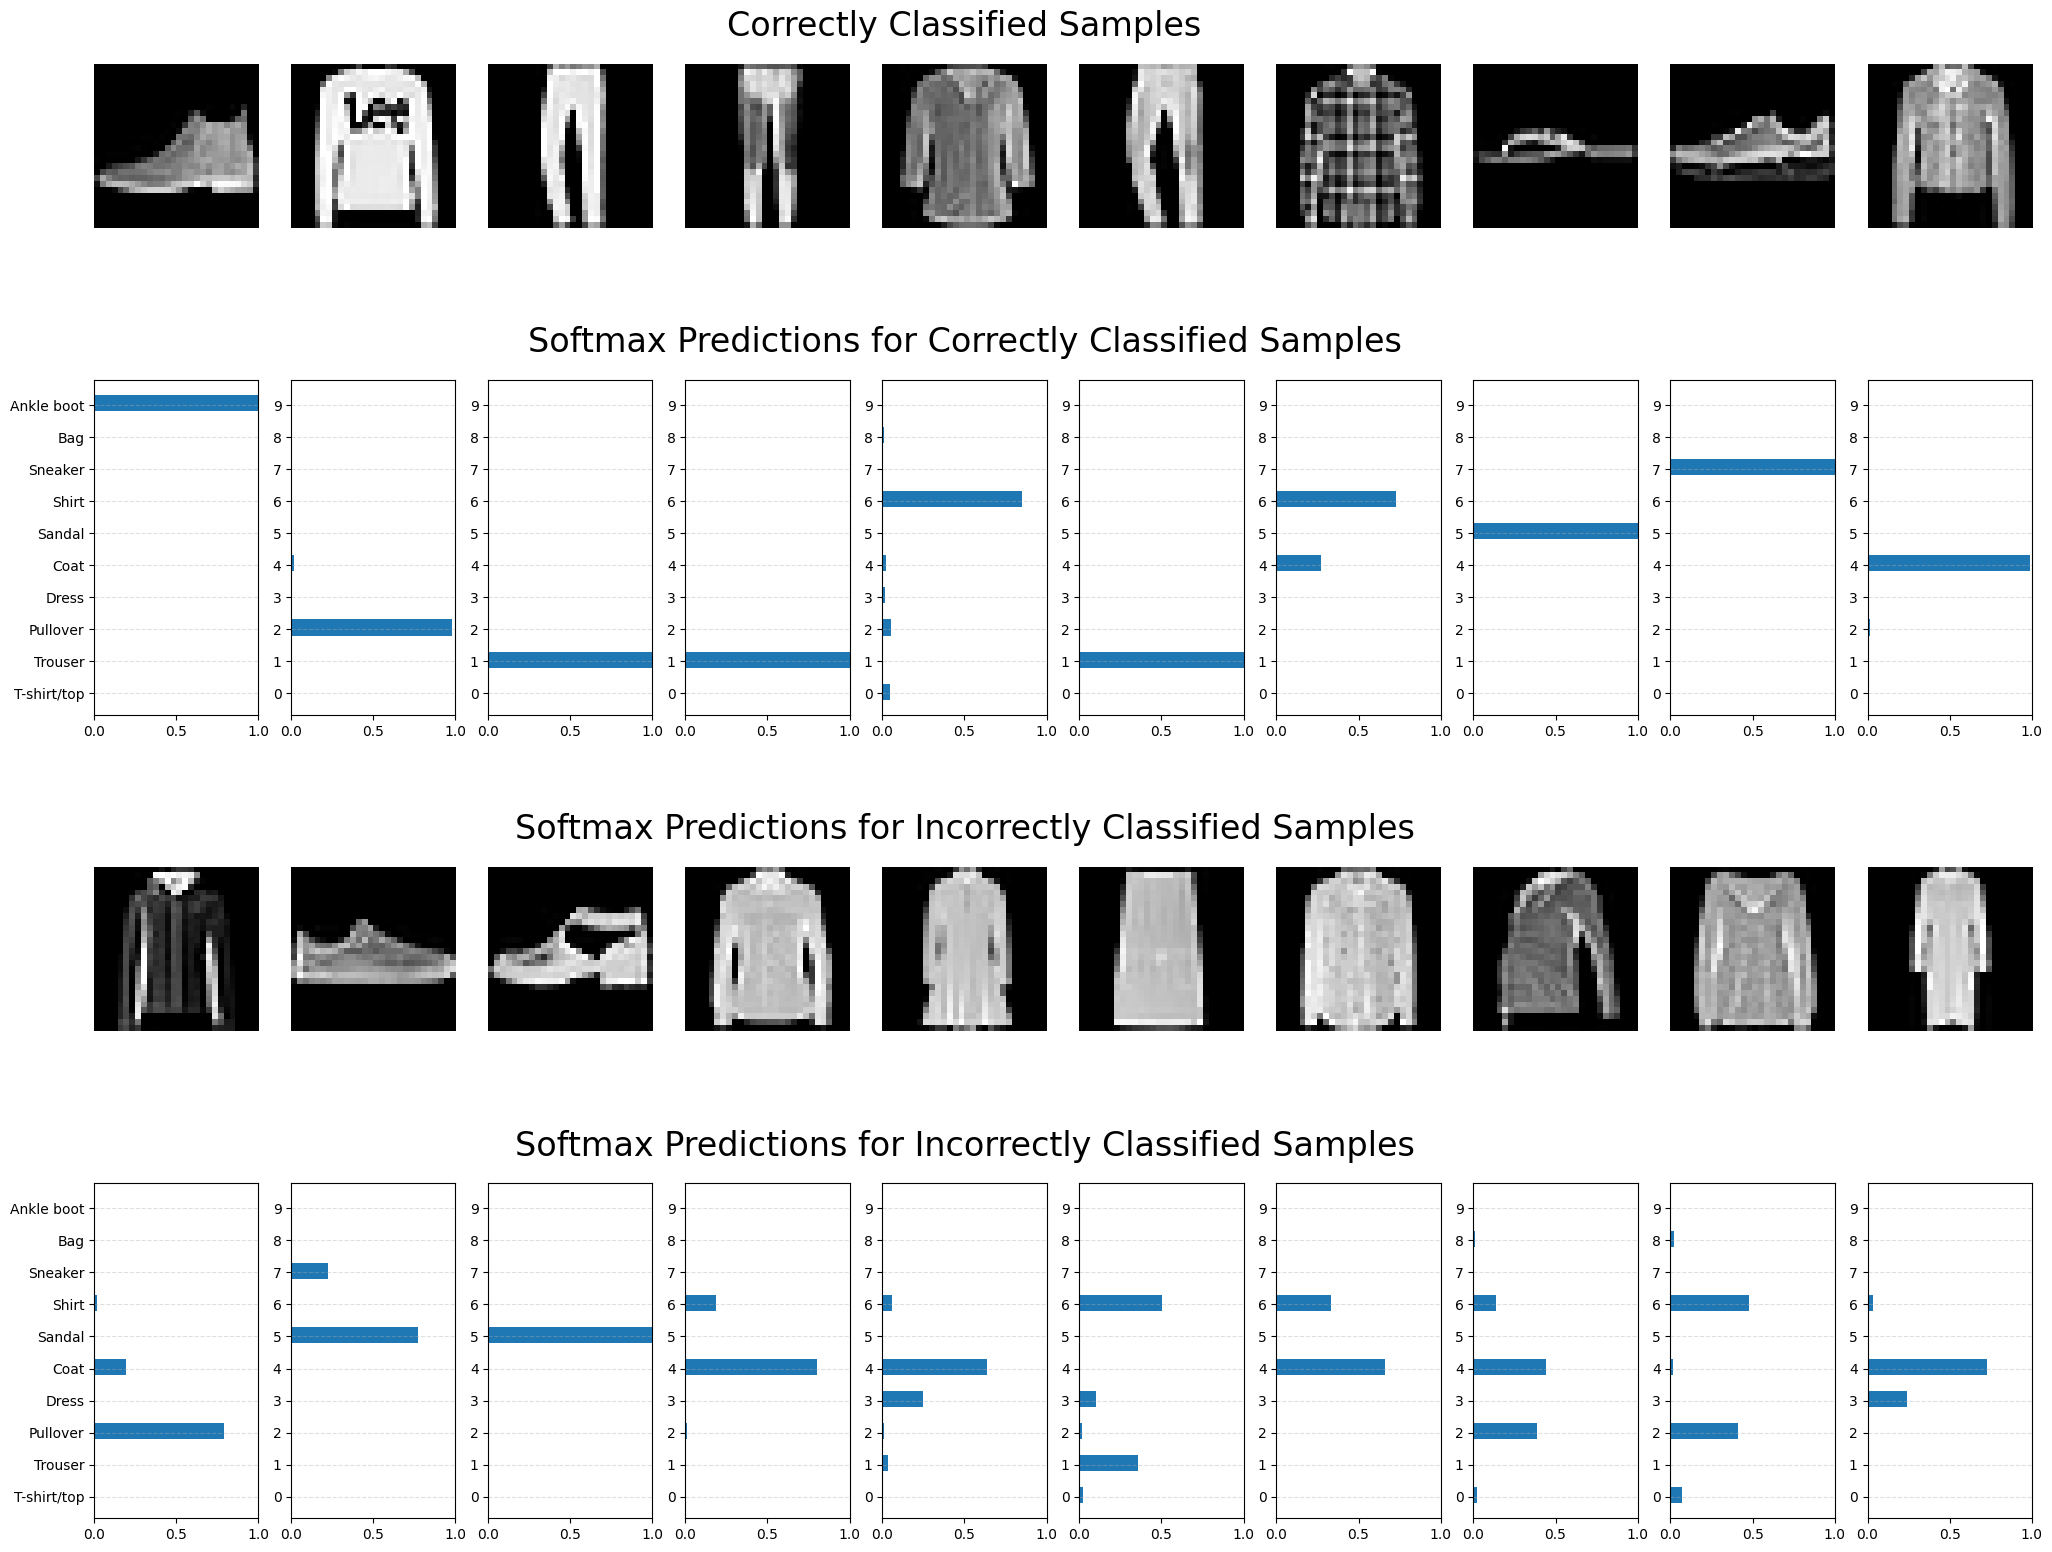

In [18]:
plot_correct_incorrect_instances(label_map=label_map)